**How are we different from the world?**

Everyone has a different personality, but I wanted to see if there are any patterns when we look at real data.

Using personality survey datasets, I explored how people score across the Big Five traits and whether some traits are more common than others.

The goal is to see what stands out and what surprised me.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("class_big5_data.csv")

means = df[['I','II','III','IV','V']].mean()

df.head()


,Name,first_name,I,II,III,IV,V
0,"Ambrosius,Colin James",Colin,74.0,70.0,80.0,97.0,96.0
1,"Amro,Tarek Junayd",Tarek,96.0,22.0,71.0,93.0,59.0
2,"Boltman,Glynn Marie",Glynn,92.0,52.0,89.0,89.0,83.0
3,"Chi,Emilie Hamin",Emilie,8.0,11.0,91.0,96.0,34.0
4,"Crawford,Kenadi Rose",Kenadi,96.0,66.0,87.0,76.0,88.0


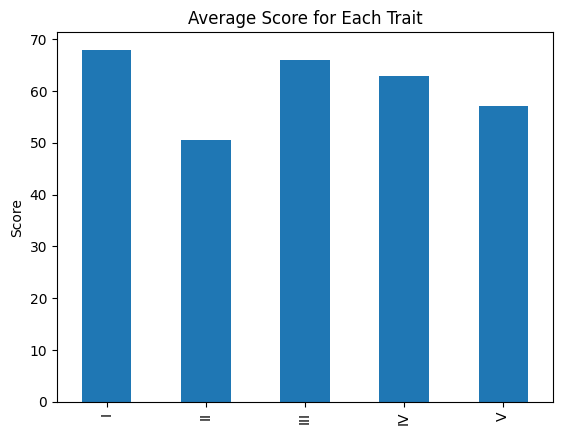

In [26]:
means.plot(kind='bar')
plt.title("Average Score for Each Trait")
plt.ylabel("Score")
plt.show()


1. I: Extraversion
2. II: Agreeableness
3. III: Conscientiousness
4. IV: Emotional Stability
5. V: Intellect/Openness

This is interesting because Trait I seems to have one of the highest average scores, while Trait II looks lower compared to the others.

This suggests that as a class, we might share stronger tendencies in some personality areas more than others.

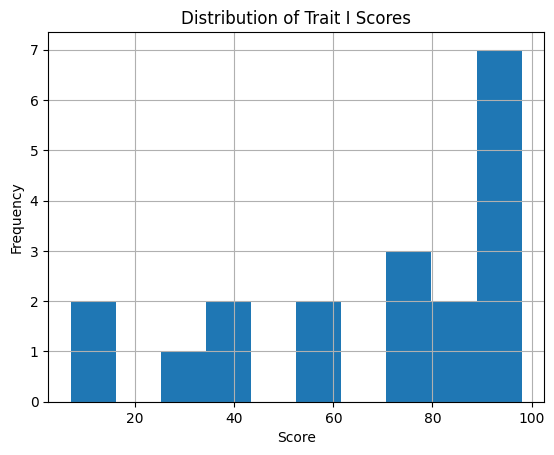

In [27]:
df['I'].hist()
plt.title("Distribution of Trait I Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

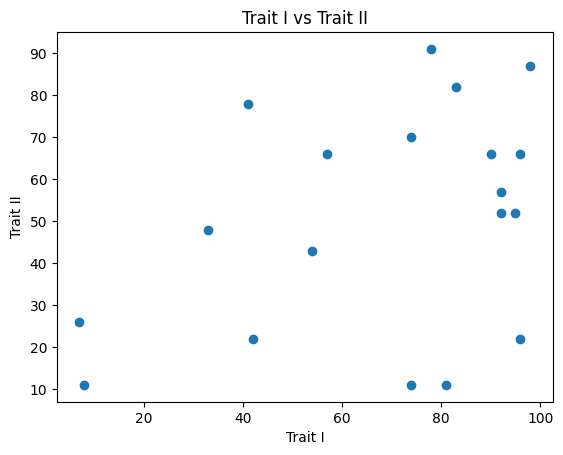

In [28]:
plt.scatter(df['I'], df['II'])
plt.xlabel("Trait I")
plt.ylabel("Trait II")
plt.title("Trait I vs Trait II")
plt.show()


Evidentally, theres no real pattern here, so lets do this for a bunch of more personality trait relationships!

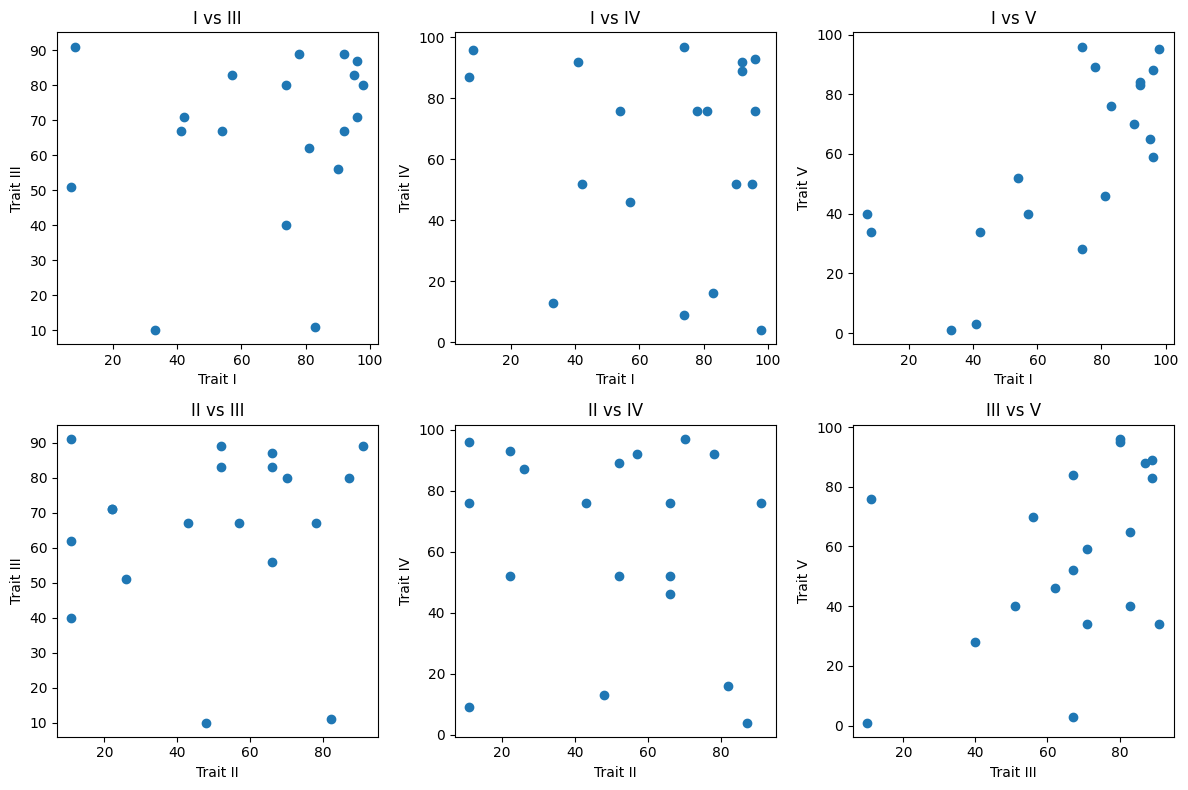

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.scatter(df['I'], df['III'])
plt.xlabel("Trait I")
plt.ylabel("Trait III")
plt.title("I vs III")

plt.subplot(2,3,2)
plt.scatter(df['I'], df['IV'])
plt.xlabel("Trait I")
plt.ylabel("Trait IV")
plt.title("I vs IV")

plt.subplot(2,3,3)
plt.scatter(df['I'], df['V'])
plt.xlabel("Trait I")
plt.ylabel("Trait V")
plt.title("I vs V")

plt.subplot(2,3,4)
plt.scatter(df['II'], df['III'])
plt.xlabel("Trait II")
plt.ylabel("Trait III")
plt.title("II vs III")

plt.subplot(2,3,5)
plt.scatter(df['II'], df['IV'])
plt.xlabel("Trait II")
plt.ylabel("Trait IV")
plt.title("II vs IV")

plt.subplot(2,3,6)
plt.scatter(df['III'], df['V'])
plt.xlabel("Trait III")
plt.ylabel("Trait V")
plt.title("III vs V")

plt.tight_layout()
plt.show()


Evidently, there's no real correlation between the most and least prominent traits in class, which tells us there are people with high scores in Trait that don’t necessarily score high in Trait II or vice versa. Personality traits are very independent.

If our scores are so scattered, and theres almost no correlation to be interpreted, it might be worth understand what this looks like for 100s of other scores! 

Maybe we can understand how this class of COMM 3180 students compare with test-takers around the world. 

In [30]:
import pandas as pd

global_df = pd.read_csv('openpsych_data.csv', sep='\t')

global_df = global_df.dropna(subset=['country'])

question_cols = global_df.columns[7:57]

for col in question_cols:
    global_df = global_df[global_df[col] != 0]

def trait_mean(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    return df[cols].mean(axis=1)

global_traits = pd.DataFrame({
    'Extraversion': trait_mean(global_df, 'E'),
    'Neuroticism': trait_mean(global_df, 'N'),
    'Agreeableness': trait_mean(global_df, 'A'),
    'Conscientiousness': trait_mean(global_df, 'C'),
    'Openness': trait_mean(global_df, 'O')
})

global_traits.head()


,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,3.2,1.9,3.2,3.1,3.1
1,2.8,2.9,3.1,2.8,2.6
2,2.9,4.6,3.8,3.3,4.1
3,3.6,4.3,3.7,3.4,3.7
4,2.6,3.2,4.0,2.6,2.2


What is noteworthy here is that all data collected for each property has been a score out of 5. 10 factors for each trait have been averaged above, but to scale this for a comparison with the class, we alternatively do the following!

In [31]:
def scaled_trait_mean(df, prefix):
    cols = [c for c in df.columns if c.startswith(prefix)]
    return 20*(df[cols].mean(axis=1))

scaled_global_traits = pd.DataFrame({
    'Extraversion': scaled_trait_mean(global_df, 'E'),
    'Neuroticism': scaled_trait_mean(global_df, 'N'),
    'Agreeableness': scaled_trait_mean(global_df, 'A'),
    'Conscientiousness': scaled_trait_mean(global_df, 'C'),
    'Openness': scaled_trait_mean(global_df, 'O')
})

scaled_global_traits.head()

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,64.0,38.0,64.0,62.0,62.0
1,56.0,58.0,62.0,56.0,52.0
2,58.0,92.0,76.0,66.0,82.0
3,72.0,86.0,74.0,68.0,74.0
4,52.0,64.0,80.0,52.0,44.0


This data now is easier to compare with the class!

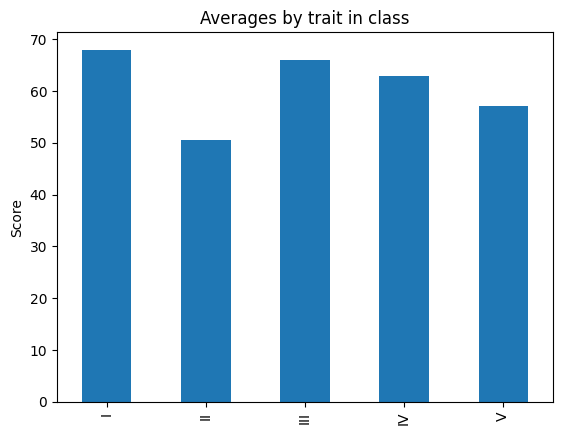

In [32]:
means.plot(kind='bar')
plt.title("Averages by trait in class")
plt.ylabel("Score")
plt.show()




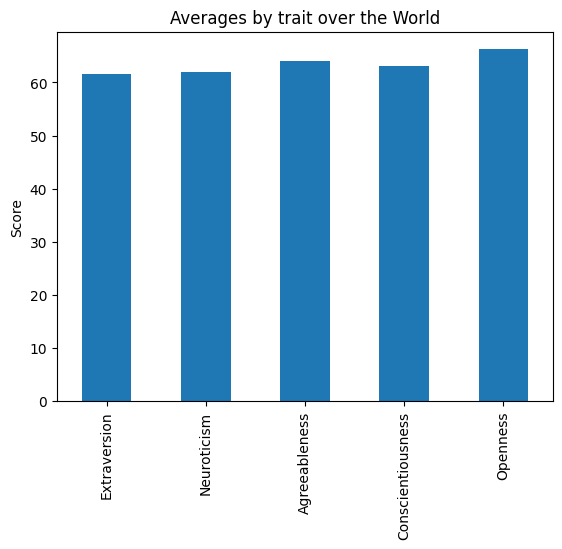

In [34]:
world_means = scaled_global_traits[['Extraversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']].mean()
world_means.plot(kind='bar')
plt.title("Averages by trait over the World")
plt.ylabel("Score")
plt.show()

This is super interesting! Evidentally theres a lot more variation of personalities in class than there is over the world. Traits are almost equally split over the world, with there being all kinds of personality compositions.

We can tell the comparison between the above plots is valid, because in both cases, scores for each trait a